# Process our data

In [239]:
import pandas as pd
raw_data = pd.read_csv("flights_data.csv")

In [240]:
raw_data

,Departing_Port,Arriving_Port,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%
0,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Jetstar,0.255319,0.234043,0.000000
1,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Qantas,0.087542,0.090909,0.003367
2,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Tigerair Australia,0.083333,0.033333,0.050000
3,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Virgin Australia,0.072874,0.068826,0.012146
4,Adelaide,Canberra,1,2010,414.0,970.229046,17.33103,29.763540,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.016930,22.526185,27.847663,Qantas,0.111111,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30111,Moranbah,Brisbane,6,2017,1277.0,779.683481,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,Virgin Australia,0.078431,0.058824,0.000000
30112,Armidale,Sydney,6,2017,326.0,382.268024,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,QantasLink,0.256198,0.297521,0.115702
30113,Armidale,Sydney,6,2017,326.0,382.268024,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,Regional Express,0.278481,0.329114,0.050633
30114,Tamworth,Sydney,6,2017,643.0,319.769513,7.14584,18.217691,1.944638,2.741813,...,1025.984182,1023.486260,4.872945,5.115312,11.379967,16.965475,QantasLink,0.180645,0.174194,0.051613


## Convert categorical variables to integer values

In [241]:
raw_data["Average_Delay_%"] = (raw_data["Arrival_Delays_%"] + raw_data["Departure_Delays_%"]) * 0.5

In [242]:
categorical_variables = ["Departing_Port", "Arriving_Port", "Airline"]

In [243]:
# Convert categorical variables into integers
processed_data = raw_data.copy()

processed_data[categorical_variables] = processed_data[categorical_variables].astype('category')
processed_data[categorical_variables] = processed_data[categorical_variables].apply(lambda x: x.cat.codes)

processed_data = processed_data.sort_values(["Year", "Month", "Departing_Port", "Arriving_Port", "Airline"])

In [244]:
processed_data

,Departing_Port,Arriving_Port,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
11,0,2,1,2010,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,1,0.000000,0.000000,0.000000,0.000000
12,0,2,1,2010,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,5,0.153846,0.153846,0.000000,0.153846
16,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,0,0.266667,0.233333,0.000000,0.250000
17,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,1,0.053191,0.031915,0.000000,0.042553
18,0,6,1,2010,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,...,1010.905502,4.167756,4.016930,22.526185,27.847663,6,0.064516,0.064516,0.000000,0.064516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30093,39,9,6,2017,20941.0,284.013192,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,3,0.066667,0.066667,0.044444,0.066667
30094,39,37,6,2017,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,0,0.500000,0.300000,0.000000,0.400000
30095,39,37,6,2017,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,6,0.263158,0.210526,0.000000,0.236842
30096,40,37,6,2017,26286.0,365.844014,7.14584,18.217691,1.944638,2.741813,...,1023.486260,4.872945,5.115312,11.379967,16.965475,2,0.187500,0.178571,0.026786,0.183036


## Create date column and make it the index.
Also, delete "Month" and "Year" columns.

In [245]:
processed_data["Date"] = processed_data["Year"].astype("str") + "-" + processed_data["Month"].astype("str") + "-1"
processed_data["Date"] = pd.to_datetime(processed_data["Date"])

In [246]:
processed_data = processed_data.set_index(processed_data["Date"])

In [247]:
del processed_data["Month"]
del processed_data["Year"]

In [248]:
processed_data

,Departing_Port,Arriving_Port,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,2,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,1,0.000000,0.000000,0.000000,0.000000,2010-01-01
2010-01-01,0,2,414.0,1316.720677,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,5,0.153846,0.153846,0.000000,0.153846,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,0,0.266667,0.233333,0.000000,0.250000,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,1,0.053191,0.031915,0.000000,0.042553,2010-01-01
2010-01-01,0,6,414.0,1619.982414,17.33103,29.763540,2.198292,8.894267,9.385116,43.838095,...,4.167756,4.016930,22.526185,27.847663,6,0.064516,0.064516,0.000000,0.064516,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,39,9,20941.0,284.013192,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,3,0.066667,0.066667,0.044444,0.066667,2017-06-01
2017-06-01,39,37,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,0,0.500000,0.300000,0.000000,0.400000,2017-06-01
2017-06-01,39,37,21097.0,1691.132106,7.14584,18.217691,1.944638,2.741813,6.264984,31.617153,...,4.872945,5.115312,11.379967,16.965475,6,0.263158,0.210526,0.000000,0.236842,2017-06-01


## Normalise the data to a value range of 0-1 (for continuous variables)

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

continuous_features = processed_data.select_dtypes("float").columns.values

processed_data[continuous_features] = scaler.fit_transform(processed_data[continuous_features])
processed_data

,Departing_Port,Arriving_Port,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,2,-0.978964,-0.359004,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,1,-1.000000,-1.000000,-1.000000,-1.000000,2010-01-01
2010-01-01,0,2,-0.978964,-0.359004,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,5,-0.692308,-0.692308,-1.000000,-0.692308,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,0,-0.466667,-0.533333,-1.000000,-0.500000,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,1,-0.893617,-0.936170,-1.000000,-0.914894,2010-01-01
2010-01-01,0,6,-0.978964,-0.179102,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,...,-0.492710,-0.672732,0.92875,0.924884,6,-0.870968,-0.870968,-1.000000,-0.870968,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,39,9,0.064021,-0.971632,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,3,-0.866667,-0.866667,-0.878014,-0.866667,2017-06-01
2017-06-01,39,37,0.071948,-0.136894,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,0,0.000000,-0.400000,-1.000000,-0.200000,2017-06-01
2017-06-01,39,37,0.071948,-0.136894,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,...,0.281368,0.353538,-0.81970,-0.730708,6,-0.473684,-0.578947,-1.000000,-0.526316,2017-06-01


In [250]:
import torch
from torch.utils.data import Dataset, DataLoader

# Remove Input Features which add dimensionality

In [251]:
processed_data_stripped = processed_data.copy()

In [252]:
del processed_data_stripped["Departing_Port"]
del processed_data_stripped["Arriving_Port"]
del processed_data_stripped["Airline"]
del processed_data_stripped["Distance"]

In [253]:
processed_data_stripped

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%,Date
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-1.000000,-1.000000,-1.000000,-1.000000,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.692308,-0.692308,-1.000000,-0.692308,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.466667,-0.533333,-1.000000,-0.500000,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.893617,-0.936170,-1.000000,-0.914894,2010-01-01
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.75723,-0.492710,-0.672732,0.92875,0.924884,-0.870968,-0.870968,-1.000000,-0.870968,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-01,0.064021,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,-0.866667,-0.866667,-0.878014,-0.866667,2017-06-01
2017-06-01,0.071948,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,0.000000,-0.400000,-1.000000,-0.200000,2017-06-01
2017-06-01,0.071948,-0.866654,-0.722034,-0.402846,-0.859416,-0.561166,-1.000000,-1.000000,-1.000000,0.830941,...,1.00000,0.281368,0.353538,-0.81970,-0.730708,-0.473684,-0.578947,-1.000000,-0.526316,2017-06-01


## Resample all data so each date only appears once

In [254]:
from datetime import datetime

processed_data_stripped = processed_data_stripped.resample("1M").mean().sort_values(["Date"])
processed_data_stripped.index = [datetime(x.year, x.month, 1) for x in processed_data_stripped.index]

In [255]:
processed_data_stripped

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.733436,-0.757230,-0.492710,-0.672732,0.928750,0.924884,-0.753857,-0.753079,-0.982163,-0.753468
2010-02-01,-0.978964,1.000000,0.825312,0.571983,0.401802,0.525122,0.465555,0.329709,0.339851,-0.105786,...,-0.346896,-0.335479,-0.230797,-0.098319,0.897853,0.834774,-0.708054,-0.684311,-0.977535,-0.696182
2010-03-01,-0.978964,0.648732,0.513030,0.030027,-0.009011,0.085560,0.023968,-0.068296,-0.026963,0.069055,...,0.115387,0.124632,-0.169272,-0.222354,0.522941,0.562586,-0.683586,-0.679725,-0.959996,-0.681655
2010-04-01,-0.978964,0.188854,0.067264,-0.590729,-0.540250,-0.281178,-0.505082,-0.295232,-0.406949,0.247822,...,0.048014,0.003168,-0.199903,0.111603,0.231739,0.111223,-0.720898,-0.721203,-0.980574,-0.721050
2010-05-01,-0.978964,-0.491670,-0.490015,-0.167351,-0.835741,-0.548955,-0.597361,-0.590519,-0.705676,0.542571,...,-0.008863,-0.058170,-0.293966,-0.054459,-0.425792,-0.469119,-0.750993,-0.712938,-0.986387,-0.731966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,-0.944469,0.826521,0.845527,0.107492,0.682252,0.621470,0.408494,0.184715,0.207762,-0.254663,...,-0.573658,-0.605251,0.320343,-0.219793,0.796073,0.844493,-0.671731,-0.670782,-0.963113,-0.671257
2017-03-01,-0.942045,0.802754,0.660969,0.741110,0.364914,0.036203,0.158345,-0.047858,-0.063320,0.244136,...,-0.450618,-0.468582,0.576297,0.154510,0.657775,0.672524,-0.594999,-0.581883,-0.900795,-0.588441
2017-04-01,-0.945396,0.018170,0.025362,-0.403561,-0.216227,-0.031805,-0.477357,-0.363960,-0.516853,0.109546,...,0.378250,0.322268,0.337699,0.162064,0.121529,0.023327,-0.728102,-0.750571,-0.938085,-0.739337
2017-05-01,-0.944012,-0.464726,-0.428400,-0.636796,-0.696793,-0.450549,-0.769925,-0.762823,-0.804369,0.608254,...,0.429512,0.410767,0.279823,0.143180,-0.391406,-0.448821,-0.734975,-0.748771,-0.976520,-0.741873


In [256]:
processed_data = processed_data_stripped

## Decide on input and output features

In [257]:
processed_data.head()

,Average_Fare,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Departure_Delays_%,Arrival_Delays_%,Cancellations_%,Average_Delay_%
2010-01-01,-0.978964,0.856267,0.933268,-0.270139,0.796919,0.863890,0.647422,0.372448,0.572945,-0.743469,...,-0.733436,-0.757230,-0.492710,-0.672732,0.928750,0.924884,-0.753857,-0.753079,-0.982163,-0.753468
2010-02-01,-0.978964,1.000000,0.825312,0.571983,0.401802,0.525122,0.465555,0.329709,0.339851,-0.105786,...,-0.346896,-0.335479,-0.230797,-0.098319,0.897853,0.834774,-0.708054,-0.684311,-0.977535,-0.696182
2010-03-01,-0.978964,0.648732,0.513030,0.030027,-0.009011,0.085560,0.023968,-0.068296,-0.026963,0.069055,...,0.115387,0.124632,-0.169272,-0.222354,0.522941,0.562586,-0.683586,-0.679725,-0.959996,-0.681655
2010-04-01,-0.978964,0.188854,0.067264,-0.590729,-0.540250,-0.281178,-0.505082,-0.295232,-0.406949,0.247822,...,0.048014,0.003168,-0.199903,0.111603,0.231739,0.111223,-0.720898,-0.721203,-0.980574,-0.721050
2010-05-01,-0.978964,-0.491670,-0.490015,-0.167351,-0.835741,-0.548955,-0.597361,-0.590519,-0.705676,0.542571,...,-0.008863,-0.058170,-0.293966,-0.054459,-0.425792,-0.469119,-0.750993,-0.712938,-0.986387,-0.731966


In [258]:
output_features = ["Average_Fare", "Average_Delay_%", 'Cancellations_%']

In [259]:
input_features = [#'Departing_Port', 'Arriving_Port', 'Airline', 'Distance'
       'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

## Graph the data

Text(0, 0.5, 'Average_Fare')

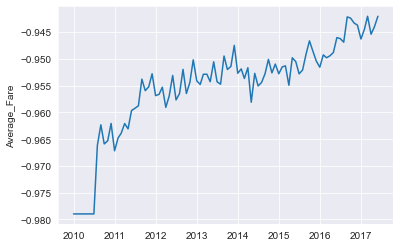

In [260]:
from matplotlib import pyplot as plt
feature = output_features[0]
plt.plot(processed_data[feature])
plt.ylabel(feature)

## Split data into a series of "windows"
(AKA "Sliding Window" processing)

In [261]:
# Source: https://www.kaggle.com/code/iamleonie/time-series-forecasting-building-intuition?scriptVersionId=90151694&cellId=6

import numpy as np

def split_sequences(features, targets, n_steps_in, n_steps_out, n_sliding_steps, window_type):
    """
    Edited from
    https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

    Args:
    * features: univariate or multivariate input sequences
    * targets: univariate or multivariate output sequences
    * n_steps_in: length of input sequence for sliding window.
    * n_steps_out: length of output sequence
    * n_sliding_steps: window step size
    * window_type: 'sliding' or 'expanding'
    """
    X, y = list(), list()
    for i in range(0, len(features), n_sliding_steps):

        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequences
        if out_end_ix > len(features):
            break

        # gather input and output parts of the pattern
        if window_type == 'sliding': # Sliding window
            seq_x, seq_y = features[i:end_ix, :], targets[end_ix:out_end_ix, :]
        else: # expanding window
            seq_x, seq_y = features[0:end_ix, :], targets[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [262]:
import seaborn as sns
from datetime import date

### Plotting functions ###
def plot_time_series_problem(X, y, data, feature : str):
    x_shape = X.shape[0]#min(X.shape[0], 50)
    fig, ax = plt.subplots(nrows=x_shape, ncols=1, figsize=(15, 2.5*x_shape))
    for i in range(x_shape):
        sns.lineplot(x=data.index.values, y=data[feature].values, ax=ax[i], color='lightgrey', marker='o')

        if i < x_shape-1:
            sns.lineplot(x=X[i][ :, 0], y=X[i][ :, 1].astype(float), ax=ax[i], color='cornflowerblue', label='train', marker='o')
            sns.lineplot(x=y[i][ :, 0], y=y[i][ :, 1].astype(float), ax=ax[i], color='orange', label='val', marker='o')
            ax[i].set_title(f"Training Sample {i}")
        else:
            sns.lineplot(x=X[i][ :, 0], y=X[i][ :, 1].astype(float), ax=ax[i], color='mediumseagreen', label='in', marker='o')
            sns.lineplot(x=y[i][ :, 0], y=y[i][ :, 1].astype(float), ax=ax[i], color='coral', label='pred', marker='o')
            ax[i].set_title(f"Testing")
        ax[i].set_xlim([date(2010, 1, 1), date(2017, 12, 1)])

    plt.tight_layout()
    plt.show()

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'cornflowerblue', label='Training loss')
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'orange', label='Validation loss')

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.ylim([-0.1, 20])
    plt.legend()

    plt.show()

In [263]:
# plot_time_series_problem(X, y, processed_data, "Rainfall")

# Model Creation and Training

In [264]:
import tensorflow as tf

In [265]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [266]:
n_features = len(output_features)
input_seq_length = 12
output_seq_length = 12

# Define model
model = Sequential()
model.add(LSTM(100,
               activation='relu',
               input_shape=(input_seq_length, n_features)))
model.add(Dense(output_seq_length))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100)               41600     
                                                                 
 dense_11 (Dense)            (None, 12)                1212      
                                                                 
Total params: 42,812
Trainable params: 42,812
Non-trainable params: 0
_________________________________________________________________


In [267]:
from sklearn.model_selection import train_test_split

In [268]:
N_EPOCHS = 10

In [281]:
X_all, y_all =split_sequences(processed_data[input_features].values,
                       processed_data[output_features].values,
                       n_steps_in = input_seq_length,
                       n_steps_out = output_seq_length,
                       n_sliding_steps = 1,
                       window_type='sliding')

n_samples = X_all.shape[0]
#print(f"Total of {n_samples} samples created.")

#plot_time_series_problem(X_all, y_all)

# Data for training/validation
X = X_all[:(n_samples - output_seq_length)]
y = y_all[:(n_samples - output_seq_length)]

# Data for testing
X_test = X_all[(n_samples - 1):]
y_test = y_all[(n_samples - 1):]

#n_features = X_all.shape[2] - 1 # column timestep is not a feature

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(input_seq_length, n_features), return_sequences=True, ))
#model.add(LSTM(100, activation='relu'))
model.add(Dense(output_seq_length))
model.compile(optimizer='adam', loss='mse')

# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Covert to float and reshape
index_X_train = X_train[:, :, 0]
index_y_train = y_train[:, :, 0]
index_X_val = X_val[:, :, 0]
index_y_val = y_val[:, :, 0]
index_X_test = X_test[:, :, 0]
index_y_test = y_test[:, :, 0]

X_train = X_train[:, :, 1:].astype(float).reshape((X_train.shape[0], input_seq_length, n_features))
y_train = y_train[:, :, 1:].astype(float)

X_val = X_val[:, :, 1:].astype(float).reshape((X_val.shape[0], input_seq_length, n_features))
y_val = y_val[:, :, 1:].astype(float)

X_test = X_test[:, :, 1:].astype(float).reshape((X_test.shape[0], input_seq_length, n_features))
y_test = y_test[:, :, 1:].astype(float)

# Fit model
history = model.fit(X_train, y_train, # Training data
                    validation_data=(X_val, y_val), # Validation data
                    epochs = N_EPOCHS, # Number of epochs
                    verbose = 0, # Don't show output. Set to 1 to see output
                    shuffle=False
                    )

# Visalize loss over epochs
#plot_history(history)

# Predict
y_pred = model.predict(X_test, verbose=0)

ValueError: in user code:

    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\losses.py", line 1486, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 12 and 2 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_19/dense_19/BiasAdd, IteratorGetNext:1)' with input shapes: [?,12,12], [?,12,2].
